# **Decision Tree**




## 1. Load and Prepare Datasets

Importing Packages

In [9]:
# Import packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib as plt
from sklearn.metrics import recall_score, f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

## Importing Datasets

I will be using datasets that have been preprocessed during the first experiment, and then split and saved into the below datasets that are ready to be used

In [10]:
X_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/train_data.csv')
X_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/dev_data.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/test_data.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_train.csv')
y_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_dev.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_test.csv')

In [11]:
#Checking the sizes of the datasets

print("The size of X_train is:",X_train.shape)
print("The size of X_dev is:",X_dev.shape)
print("The size of X_test is:",X_test.shape)
print("The size of y_train is:",y_train.shape)
print("The size of y_dev is:", y_dev.shape)
print("The size of y_test is:",y_test.shape)

The size of X_train is: (82310, 36)
The size of X_dev is: (20578, 36)
The size of X_test is: (25723, 36)
The size of y_train is: (82310, 1)
The size of y_dev is: (20578, 1)
The size of y_test is: (25723, 1)


In [12]:
#checking the distribution of the Target values among the train dataset

y_train.value_counts()

Target
0         80056
1          2254
dtype: int64

In [13]:
#checking the distribution of the Target values among the dev dataset

y_dev.value_counts()

Target
0         20015
1           563
dtype: int64

In [14]:
#checking the distribution of the Target values among the test dataset

y_test.value_counts()

Target
0         25019
1           704
dtype: int64

## Modeling

### Assesing Baseline Model

In [15]:
# Creating a database filled with 1
y_base = np.full(y_train.shape, 1)

# Calculating the recall score
print("The recall Score of this model is:",recall_score(y_train, y_base))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_train, y_base))


The recall Score of this model is: 1.0
The f1 Score of this model is: 0.053308736578212945


### Train a Decision Tree Classifier

In [16]:
#Initiating a Decision Tree class with spcific hyperparameters
tree = DecisionTreeClassifier(random_state=42, min_samples_split=30, max_depth =15)

#Fitting the data in it
tree.fit(X_train, y_train)

#Making Predictions
y_train_preds = tree.predict(X_train)

#Checking the Recall scores
print("The Recall Score of this model is:",recall_score(y_train, y_train_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_train, y_train_preds))

#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_preds)


The Recall Score of this model is: 0.8087843833185449
The f1 Score of this model is: 0.8568742655699177


array([[79878,   178],
       [  431,  1823]])

Model is overfitting the trainig data but we wil check on the dev data

Predicting Dev data

In [17]:
#Making Predictions
y_dev_preds = tree.predict(X_dev)

#Checking the scores
print("The Recall Score of this model is:",recall_score(y_dev, y_dev_preds))

# Calculating the accuracy score
print("The f1 Score of this model is:",f1_score(y_dev, y_dev_preds))

#Checking the Confusion Matrix
confusion_matrix(y_dev, y_dev_preds)

The Recall Score of this model is: 0.7300177619893428
The f1 Score of this model is: 0.7851002865329513


array([[19942,    73],
       [  152,   411]])

Model is performing well on the deviation test so we can go ahead and test it on the test set

Test Dataset

In [18]:
#Making Predictions
y_test_preds = tree.predict(X_test)

#Checking recall the scores
print("The recall Score of this model is:",recall_score(y_test, y_test_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_test, y_test_preds))

#Checking the Confusion Matrix
confusion_matrix(y_test, y_test_preds)

The recall Score of this model is: 0.7471590909090909
The f1 Score of this model is: 0.8036669213139802


array([[24940,    79],
       [  178,   526]])

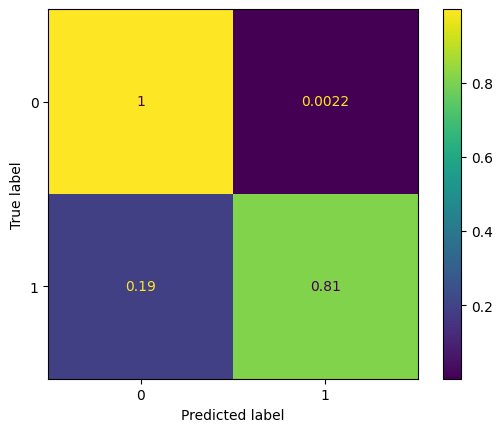

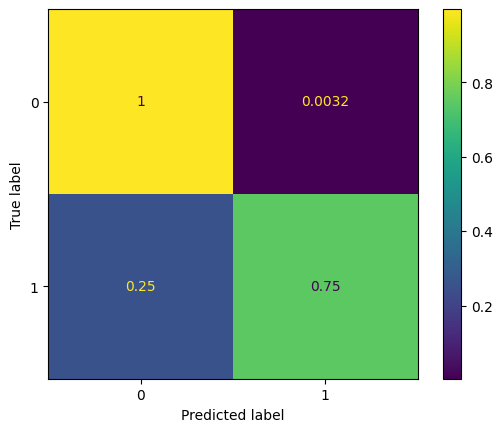

In [19]:
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, normalize='true')